<a href="https://colab.research.google.com/github/iliyasalve/Cats_Dogs_Image_Classification/blob/main/source/Cats_Dogs_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Data

Note: You need to download the json file from Kaggle's API from your personal account on the website https://www.kaggle.com/settings/account and then add this file to the project directory

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Note: Downloading data from the site https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 95.7MB/s]
100% 1.06G/1.06G [00:11<00:00, 96.3MB/s]


In [ ]:
!unzip 'dogs-vs-cats.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.

# Import libraries and packages

In [ ]:
import tensorflow as tf
from tensorflow import keras

from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import cv2

# Preparing data for training using Data Augmentation

In [ ]:
batch_size = 16

# augmentation configuration for training
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

# augmentation configuration for testing, only rescaling
test_datagen = ImageDataGenerator(rescale = 1./255)

# generator
train_generator = train_datagen.flow_from_directory(
    directory = '/content/train', #target directory
    target_size = (150, 150), # all image will be resized to 150x150
    batch_size = batch_size,
    class_mode = 'binary'
)

# generator
validation_generator = test_datagen.flow_from_directory(
    directory = '/content/test', #target directory
    target_size = (150, 150), # all image will be resized to 150x150
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


# Creating, configuring and training a CNN model

Сreating a model

In [ ]:
model = Sequential()

Model setup

In [ ]:
model.add(Conv2D(32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', input_shape = (150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3, 3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

In [ ]:
model.add(Flatten()) # converts 3D feature maps to 1D feature vectors

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model training

In [ ]:
model.fit_generator(
    train_generator,
    steps_per_epoch = 2000 // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 800 // batch_size
)

Epoch 1/50


<ipython-input-11-eb6cad7d4ed4>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


125/125 [==============================] - 24s 133ms/step - loss: 2.6833 - accuracy: 0.5165 - val_loss: 5.3524 - val_accuracy: 0.5075
Epoch 2/50
125/125 [==============================] - 16s 126ms/step - loss: 0.8571 - accuracy: 0.5765 - val_loss: 2.4616 - val_accuracy: 0.5063
Epoch 3/50
125/125 [==============================] - 16s 126ms/step - loss: 0.8336 - accuracy: 0.5790 - val_loss: 0.7429 - val_accuracy: 0.5437
Epoch 4/50
125/125 [==============================] - 15s 119ms/step - loss: 0.7743 - accuracy: 0.6085 - val_loss: 1.1385 - val_accuracy: 0.5738
Epoch 5/50
125/125 [==============================] - 16s 128ms/step - loss: 0.7181 - accuracy: 0.6185 - val_loss: 0.6106 - val_accuracy: 0.6637
Epoch 6/50
125/125 [==============================] - 15s 120ms/step - loss: 0.7207 - accuracy: 0.6435 - val_loss: 0.7213 - val_accuracy: 0.5500
Epoch 7/50
125/125 [==============================] - 15s 121ms/step - loss: 0.6680 - accuracy: 0.6775 - val_loss: 0.9497 - val_accuracy: 0.6

Accuracy graph

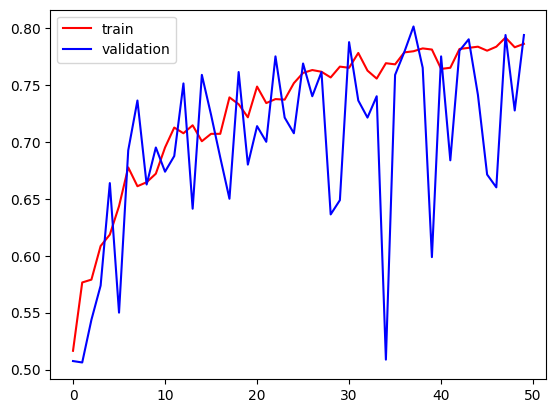

In [ ]:
plt.plot(model.history.history['accuracy'], color = 'red', label = 'train')
plt.plot(model.history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

Loss graph

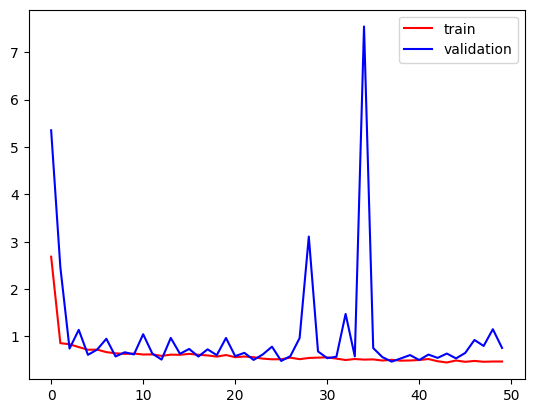

In [ ]:
plt.plot(model.history.history['loss'], color = 'red', label = 'train')
plt.plot(model.history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

Saving the model

In [ ]:
model.save('cat_dog_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Loading the model


In [ ]:
# trained_model = keras.models.load_model('cat_dog_model.h5')

# Test the model on new images

Uploading new images

Note: images for tests are taken from wikimedia.org

In [ ]:
!wget --quiet --no-check-certificate "https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Dog_Breeds.jpg/800px-Dog_Breeds.jpg" -O dog.jpg

In [ ]:
!wget --quiet --no-check-certificate "https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Colossus_the_Cat_2.JPG/800px-Colossus_the_Cat_2.JPG" -O cat.jpg

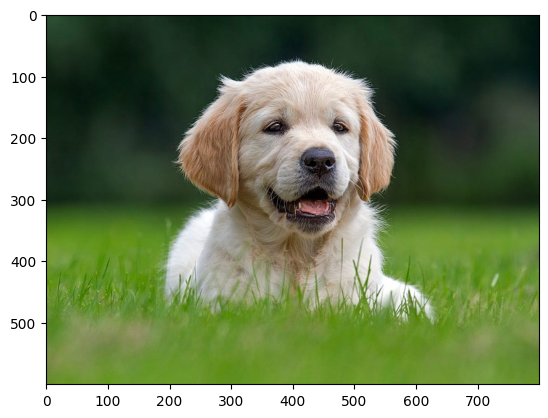

In [ ]:
test_img_dog = cv2.imread('dog.jpg')
plt.imshow(cv2.cvtColor(test_img_dog, cv2.COLOR_BGR2RGB))

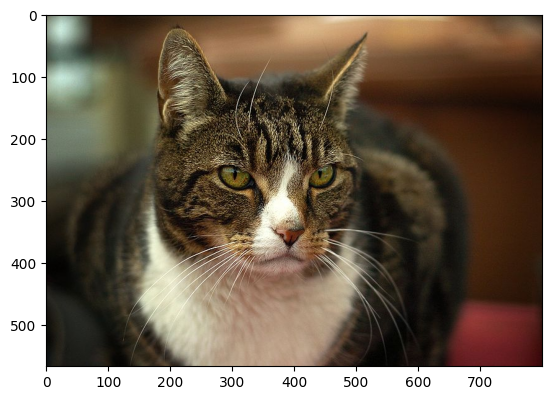

In [ ]:
test_img_cat = cv2.imread('cat.jpg')
plt.imshow(cv2.cvtColor(test_img_cat, cv2.COLOR_BGR2RGB))

In [ ]:
test_img_dog.shape

(600, 800, 3)

In [ ]:
test_img_cat.shape

(567, 800, 3)

Predicting what is shown in the image

In [ ]:
def predict_result(input_img):
  input_img = cv2.resize(input_img, (150, 150))
  output = input_img.reshape((1, 150, 150, 3))

  result = int(model.predict(output)[0][0])

  return(f"It's a cat" if result == 0 else f"It's a dog")

In [ ]:
predict_result(test_img_dog)

1/1 [==============================] - 0s 17ms/step


"It's a dog"

In [ ]:
predict_result(test_img_cat)

1/1 [==============================] - 0s 17ms/step


"It's a cat"